<a href="https://githubtocolab.com/Astolfo2332/ICFES_pro_prediction/Final_proyect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

<div style="display: flex; align-items: center;">
    <div>
        <h2>Actividad final portafolio</h2>
        <h2>Miguel López</h2>
        <h2>ID 1001014378</h2>
    </div>
    <img src="https://yt3.ggpht.com/-10IUL9wra6k/AAAAAAAAAAI/AAAAAAAAAAA/UOBLu1uYOOE/s900-c-k-no/photo.jpg" alt="Image description" width="200" style="margin-left: 20px;"/>
</div>

## 0. Obtención de datos


El dataset es obtenido por medio de una competencia de Keaggle. Este contiene información socioeconómica de los estudiantes al momento de presentar la prueba ICFES en Colombia desde el 2018 a 2021. La meta es encontrar una relación entre estas características y su puntaje final en la prueba lo cual se establece con 4 variables, bajo, medio-bajo, medio-alto y alto.


La prueba ICFES en Colombia se realiza a los estudiantes a punto de obtener su pregrado, lo cual es el primer paso a la vida laboral. Esta se compone por varios módulos como razonamiento lógico, ciencias sociales, lectura crítica, escritura e inglés.

También se debe saber que Colombia es un país con diferencias socioeconómicas muy marcadas las cuales afectan en gran medida el rendimiento de los estudiantes o su futuro académico. Así que es importante de antemano conocer las necesidades y falencia que pueda tener un estudiante a la hora de presentar el examen ICFES para de antemano poder ayudar y a las poblaciones más vulnerables y así romper las barreras sociales y económicas a la hora de educar estudiantes capaces de culminar la educación superior. Además de intrínsecamente evaluar al programa estudiado y la institución educativa.



### 0.1 Por medio de Kaggle (recomendado)

- Se debe tener una cuenta de Kaggle.
- Descargar el token de acceso a traves de la pagina.
- Crear una carpeta padre en la ubicación home de os llamada "./kaggle" . (este proceso se automatiza en este notebook solo es necesario tener el kaggle.json en la carpeta kaggle, aunque solo en entornos basados en UNIX)

A traves de el api de kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle/kaggle.json ~/.kaggle/
!kaggle competitions download -c udea-ai4eng-20242
!unzip udea-ai4eng-20242.zip
!mkdir data
!mv *.csv data/

### 0.2 A traves del One Drive de la universidad

En construcción

## 1. Exploración de la información

### 1.1 Carga de datos

In [104]:
import pandas as pd

In [105]:
df = pd.read_csv("data/train.csv")
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


Después de la carga nos interesa conocer cuales son sus datos y como están distribuidos

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(2), object(10)
memory

Entendiendo entonces que nuestra variable a predecir es RENDIMIENTO_GLOBAL, la cual al ser categórica encasilla esta tarea en un problema de clasificación, también podemos observar que la mayoría del dataset se compone de datos categóricos a diferencia de ID y periodo.

El dataset lo constituye:
- ID: valor específico del estudiante
- ESTU_PRGM_ACADEMICO: Programa académico culminado
-	ESTU_PRGM_DEPARTAMENTO: Departamento donde se realiza la prueba.
-	ESTU_VALORMATRICULAUNIVERSIDAD: Valor del semestre académico del estudiante.
-	ESTU_HORASSEMANATRABAJA: Cantidad de horas de trabajo a la semana del estudiante.
-	FAMI_ESTRATOVIVIENDA: Estrato del estudiante, esta es una medida económica de las facilidades o servicios los cuales cuenta cerca del hogar. A mayor estrato usualmente se equipará un mejor estilo de vida.
-	FAMI_TIENEINTERNET: Respuesta en Si o No si el estudiante cuenta con internet
-	FAMI_EDUCACIONPADRE: Nivel de educación máxima obtenido por el padre
-	FAMI_EDUCACIONMADRE: Nivel de educación máxima obtenido por la madre.
-	ESTU_PAGOMATRICULAPROPIO: Valor si el estudiante paga la matricula con sus propios recursos.
-	RENDIMIENTO_GLOBAL: Clase a predecir, como se menciona anteriormente se divide en 4 clases.

Así entonces, los datos al ser categóricos nos interesan saber cómo están distribuidos a que datos les podemos prestar mayor interés en el entrenamiento.

Inicialmente observamos cuantos datos existen de cada clase a predecir para saber si el dataset esta desbalanceado y así tomar acciones a futuro.

In [107]:
#Observamos la distribución de los datos target
df["RENDIMIENTO_GLOBAL"].value_counts()

RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64

En este caso los valores de cada clase son muy similares, también observaremos la cantidad de datos faltantes para su posterior reemplazo dependiendo de la distribución de los grupos de estudio para cada clase.

In [108]:
def null_data_info(df):
    #Obtenemos los valores nulos de cada columna y se organiza de manera descendente
    total = df.isnull().sum().sort_values(ascending=False)
    #Extraemos su porcentaje con respecto a los datos y los ordenamos de manera descendente
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    #Unimos las dos columnas
    missing = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
    return missing

null_data_info(df)

,Total,Percent
FAMI_ESTRATOVIVIENDA,32137,4.640722
ESTU_HORASSEMANATRABAJA,30857,4.455884
FAMI_TIENEINTERNET,26629,3.845343
FAMI_EDUCACIONMADRE,23664,3.417184
FAMI_EDUCACIONPADRE,23178,3.347004
ESTU_PAGOMATRICULAPROPIO,6498,0.938339
ESTU_VALORMATRICULAUNIVERSIDAD,6287,0.907870
ID,0,0.000000
ESTU_PRGM_DEPARTAMENTO,0,0.000000
ESTU_PRGM_ACADEMICO,0,0.000000


Siendo estos la mayoría datos categóricos, los cuales reemplazaremos por medio de la moda de cada clase en su grupo especifico.

In [109]:
def fill_na(df):
    #Agrupamos los valores por cada clase, luego aplicamos una transformación a cada columna donde se extrae el primer valor de la moda, solo si
    #no está vacío de lo contrario se pasa un nan
    modes = df.groupby("RENDIMIENTO_GLOBAL", observed=False).transform(lambda x: x.mode().iloc[0] if not x.mode().empty else x.nan)
    #Si se encuentra un vacío se reemplaza por el valor del frame modes
    df.fillna(modes, inplace=True)
    return df

In [110]:
df = fill_na(df)

Evaluamos que la corrección funcione

In [102]:
null_data_info(df)

,Total,Percent
ID,0,0.0
PERIODO,0,0.0
ESTU_PRGM_ACADEMICO,0,0.0
ESTU_PRGM_DEPARTAMENTO,0,0.0
ESTU_VALORMATRICULAUNIVERSIDAD,0,0.0
ESTU_HORASSEMANATRABAJA,0,0.0
FAMI_ESTRATOVIVIENDA,0,0.0
FAMI_TIENEINTERNET,0,0.0
FAMI_EDUCACIONPADRE,0,0.0
FAMI_EDUCACIONMADRE,0,0.0


Ahora nos interesa observar como esta distribuida la información

### 1.1.1 Histogramas basados en grupos

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [50]:
def plot_distribution(df, column, target, title="Frecuencia de valores con respecto al target"):
    plt.figure(figsize=(12, 9))
    sns.countplot(x=column, data=df, hue=target)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.legend(title=target)
    plt.show()

In [51]:
#Definimos una función que extrae el primer número de una cadena si no se encuentra se retorna infinito
def get_oredered(s:str):
    numbers = re.findall(r'\d+', s)
    #map pasa los numeros de str a int y luego se extrae el mínimo
    return min(map(int, numbers)) if numbers else float('inf')

#Ahora los organizamos con respecto a la función get_ordered
def sort_strings(lst):
    return sorted(lst, key=get_oredered)

In [52]:
#Se deben establecer un orden para las columnas así evitamos que las gráficas se muestren de manera incorrecta, organizándolos de la forma
#donde inicialmente se estipula el orden y luego con la función de categorical se ordenan

target_order = ["bajo", "medio-bajo", "medio-alto", "alto"]
df["RENDIMIENTO_GLOBAL"] = pd.Categorical(df["RENDIMIENTO_GLOBAL"], categories=target_order, ordered=True)

estrato_order = sort_strings(df["FAMI_ESTRATOVIVIENDA"].unique())
df["FAMI_ESTRATOVIVIENDA"] = pd.Categorical(df["FAMI_ESTRATOVIVIENDA"], categories=estrato_order, ordered=True)



#### 1.1.1.1 Influebcia del estrato en el rendimiento

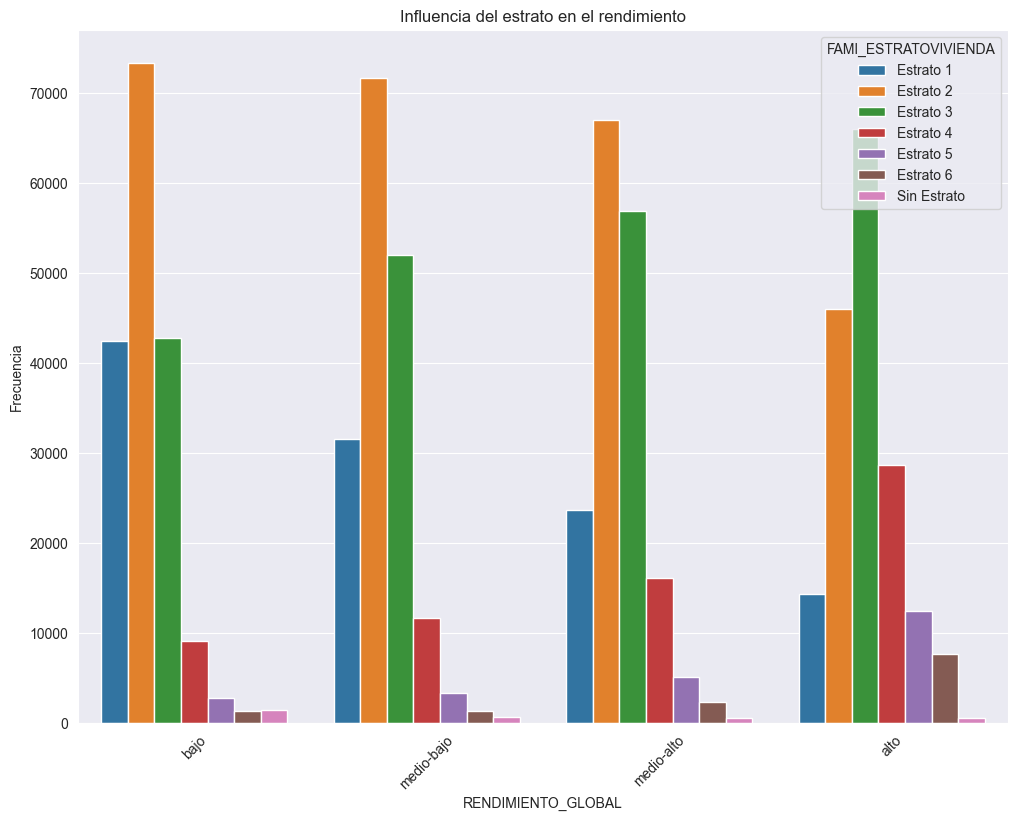

In [53]:
plot_distribution(df, "RENDIMIENTO_GLOBAL", "FAMI_ESTRATOVIVIENDA", "Influencia del estrato en el rendimiento")


Donde podemos observar un aumento de puntaje a medida que existe más población de los estratos elevados. Y claro una disminución de puntaje con respecto a estratos más bajos.

#### 1.1.1.2 Influencia de las horas de trabajo en el rendimiento

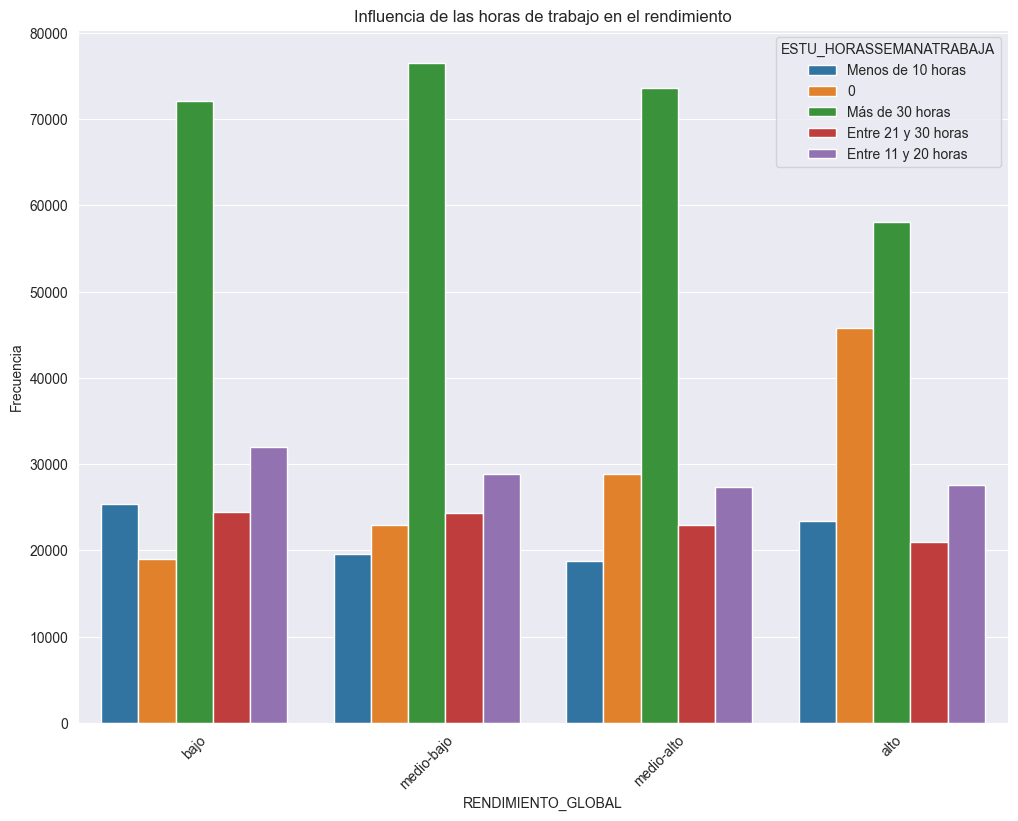

In [54]:
order = sort_strings(df["ESTU_HORASSEMANATRABAJA"].unique())
df['FAMI_ESTRATOVIVIENDA'] = pd.Categorical(df['FAMI_ESTRATOVIVIENDA'], categories=order, ordered=True)
plot_distribution(df, "RENDIMIENTO_GLOBAL", "ESTU_HORASSEMANATRABAJA", "Influencia de las horas de trabajo en el rendimiento")


 En este caso observamos que las horas de trabajo no parecen influenciar mucho en el desempeño de los estudiantes ya que todas las distribuciones son similares para cada clase.

#### 1.1.1.3 Influencia del valor de matricula


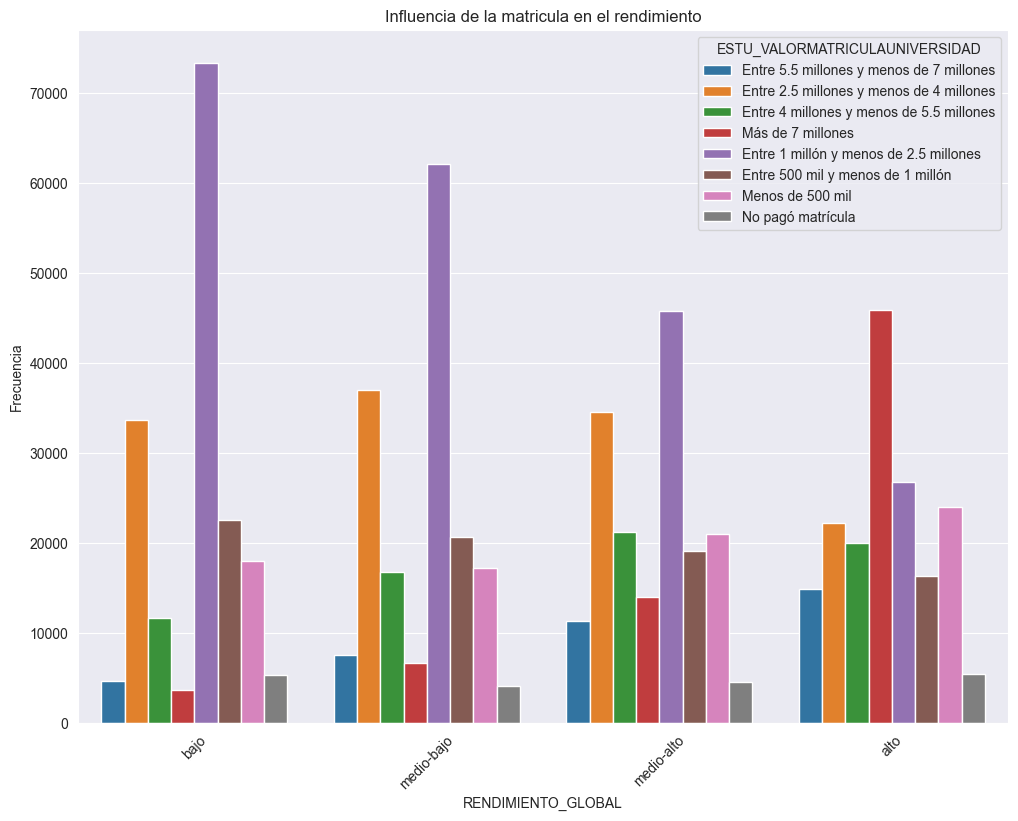

In [55]:
order = sort_strings(df["ESTU_VALORMATRICULAUNIVERSIDAD"].unique())
df['FAMI_ESTRATOVIVIENDA'] = pd.Categorical(df["ESTU_VALORMATRICULAUNIVERSIDAD"], categories=order, ordered=True)
plot_distribution(df, "RENDIMIENTO_GLOBAL", "ESTU_VALORMATRICULAUNIVERSIDAD", "Influencia de la matricula en el rendimiento")


En este caso solo se puede asumir que el valor entre 1 mill y 2.5 mill es más propenso a tener un menor puntaje en las pruebas

#### 1.1.1.4 Distribución de la media departamental

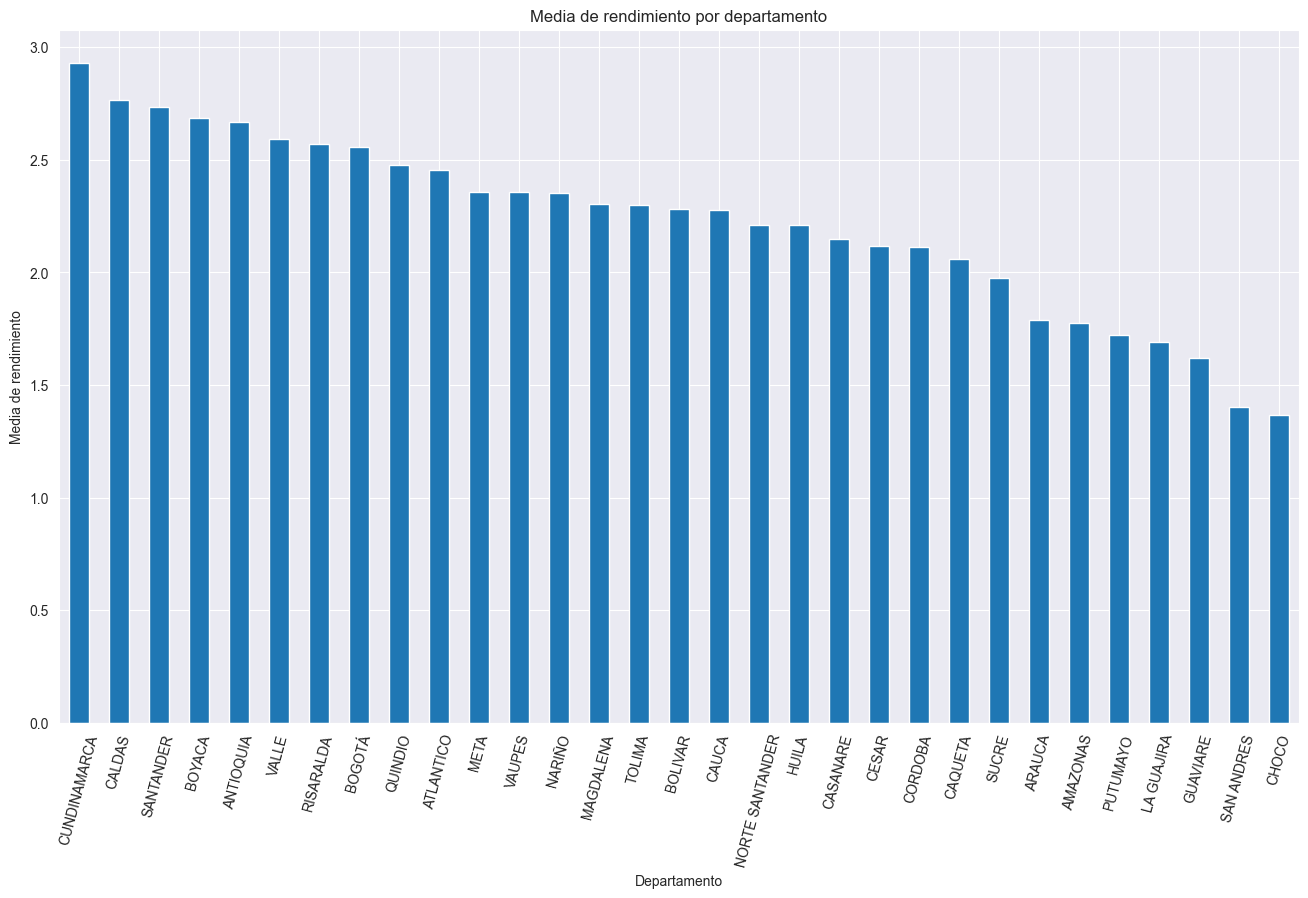

In [64]:
#Inicialmente agregamos un encoding a la columna para poder promediar los resultados
df["VAL_REND"] = df["RENDIMIENTO_GLOBAL"].map({"bajo": 1, "medio-bajo": 2, "medio-alto": 3, "alto": 4}).astype(int)
#Agrupamos por departamento y obtenemos la media
department_mean = df.groupby("ESTU_PRGM_DEPARTAMENTO")["VAL_REND"].mean().sort_values(ascending=False)

department_mean.plot(kind="bar", figsize=(16, 9))
plt.title("Media de rendimiento por departamento")
plt.xlabel("Departamento")
plt.ylabel("Media de rendimiento")
plt.xticks(rotation=75)
plt.show()


Se puede observar una gran diferencia entre departamentos, pero no se puede asumir que sea una relación directa con el rendimiento de los estudiantes, ya que puede ser un sesgo de la cantidad de estudiantes que presentan la prueba en cada departamento. Más sin embargo para entrenar un modelo se tienen datos bastante cercanos con una diferencia de 1.5 puntos entre el valor máximo y minimo de calificación en los departamentos.

### 1.1.2 Matriz de correlación

Para terminar con la exploración vamos a realizar una matriz de correlación para observar si existe alguna relación entre las variables.

Para esto inicialmente transformaremos todos los datos a númericos y los pasaremos por un encoder.

In [115]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
#Por las modificaciones anteriores se vuelve a cargar el dataset
df = pd.read_csv("data/train.csv")
df = fill_na(df)

df_encoded = df.copy()
for column in df_encoded.columns:
    if df_encoded[column].dtype == "object" or "category":
        df_encoded[column] = encoder.fit_transform(df_encoded[column])

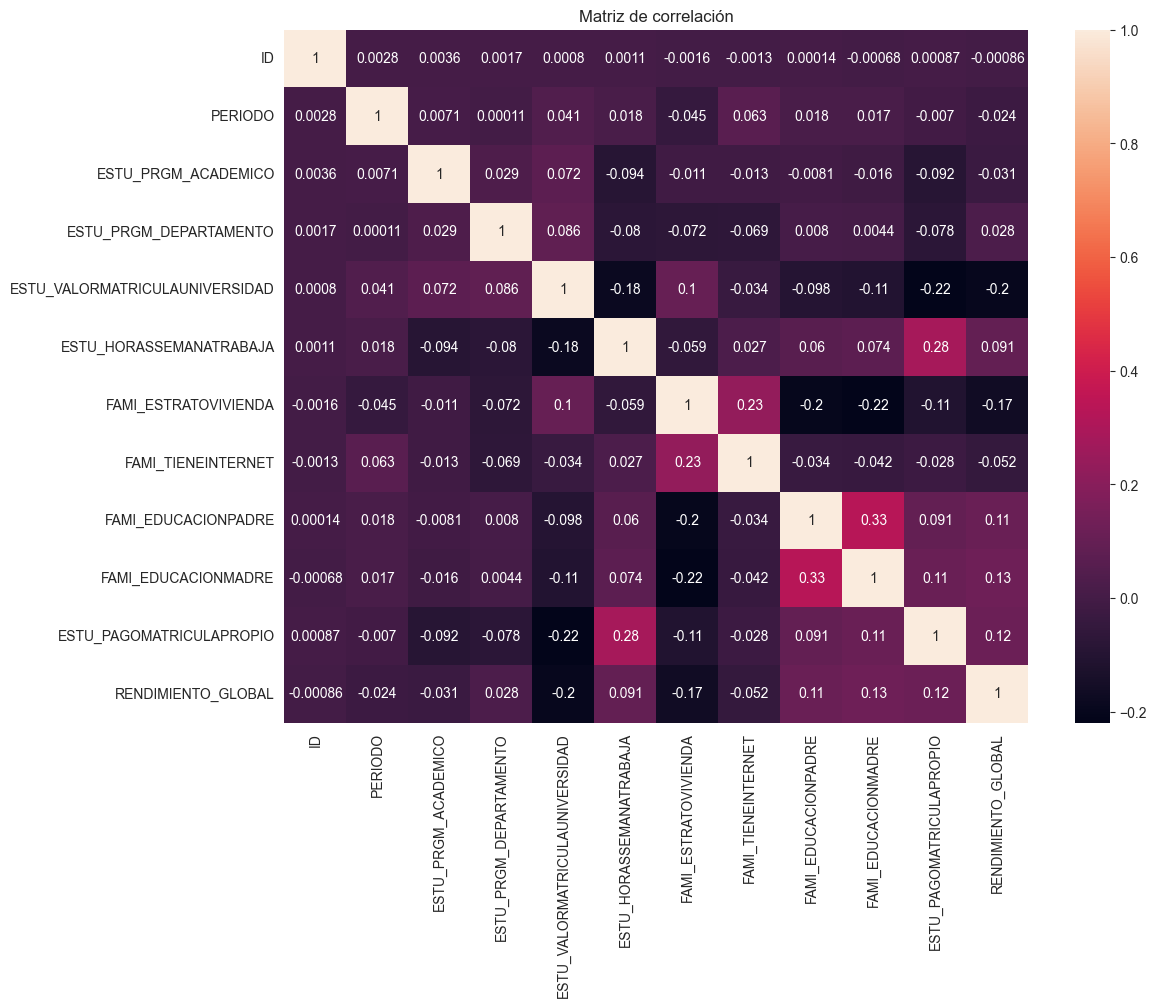

In [118]:
plt.figure(figsize=(12, 9))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Matriz de correlación")
plt.show()

Ahora para identificar las caracteristicas más importantes para el modelo

In [120]:
target_corr_df = pd.DataFrame(corr_matrix["RENDIMIENTO_GLOBAL"].sort_values(ascending=False))
target_corr_df

,RENDIMIENTO_GLOBAL
RENDIMIENTO_GLOBAL,1.000000
FAMI_EDUCACIONMADRE,0.126908
ESTU_PAGOMATRICULAPROPIO,0.118409
FAMI_EDUCACIONPADRE,0.113644
ESTU_HORASSEMANATRABAJA,0.090958
ESTU_PRGM_DEPARTAMENTO,0.028170
ID,-0.000860
PERIODO,-0.023727
ESTU_PRGM_ACADEMICO,-0.031079
FAMI_TIENEINTERNET,-0.052042


Observando así que las variables más importantes son: el estrato de la vivienda, el valor de la matrícula y el nivel de educación de la madre